# Machine Learning Pipelines 

# What is machine learning pipelines?
- Each and every life cycle can run independently
- suppose , we will create one code or one file for data analysis,feature engineering etc. , then can run independently
- then we can link each file together


# All the Lifecycle in a Data Science Projects
- Data Analysis
- Feature Engineering
- Feature Selection
- Model Building
- Model Deployment

In [1]:
# Today video we will do only data analysis part
# The data set has more than 80+ features  Advance House Price Prediction
# Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

# In Data Analysis we will analyze to find out the below stuff

- Missing Values
- All the Numerical Variables
- Distribution of the numerical variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relation ship between independent and dependent feature(Sale Price)

In [4]:
# Missing Values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Here We will check the percentage of nan values present in each feature
# 1- Step make the list of feature which has missing values
feature_with_nan=[features for features in df.columns if df[features].isnull().sum()]
feature_with_nan # Features with nan value

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
# 2
# I am iterating( going through every feature)
# Percentage of missing values
for feature in feature_with_nan:
    print(feature,np.round(df[feature].isnull().mean(),4), '% Missing Values')
# whatever the null value mean we are getting, I am rounding it up till 4 decimal points and i printing it with the missing values
# This many features have nan value

LotFrontage 0.1774 % Missing Values
Alley 0.9377 % Missing Values
MasVnrType 0.0055 % Missing Values
MasVnrArea 0.0055 % Missing Values
BsmtQual 0.0253 % Missing Values
BsmtCond 0.0253 % Missing Values
BsmtExposure 0.026 % Missing Values
BsmtFinType1 0.0253 % Missing Values
BsmtFinType2 0.026 % Missing Values
Electrical 0.0007 % Missing Values
FireplaceQu 0.4726 % Missing Values
GarageType 0.0555 % Missing Values
GarageYrBlt 0.0555 % Missing Values
GarageFinish 0.0555 % Missing Values
GarageQual 0.0555 % Missing Values
GarageCond 0.0555 % Missing Values
PoolQC 0.9952 % Missing Values
Fence 0.8075 % Missing Values
MiscFeature 0.963 % Missing Values


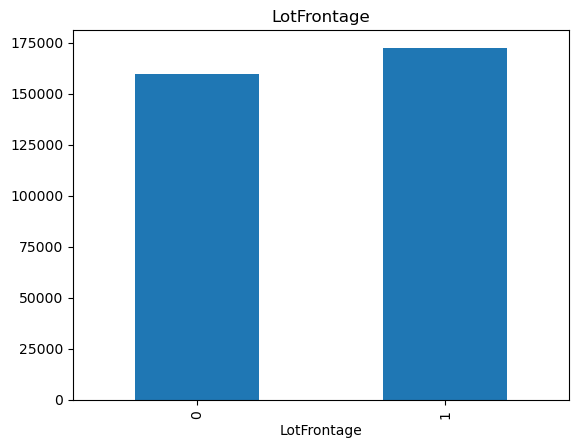

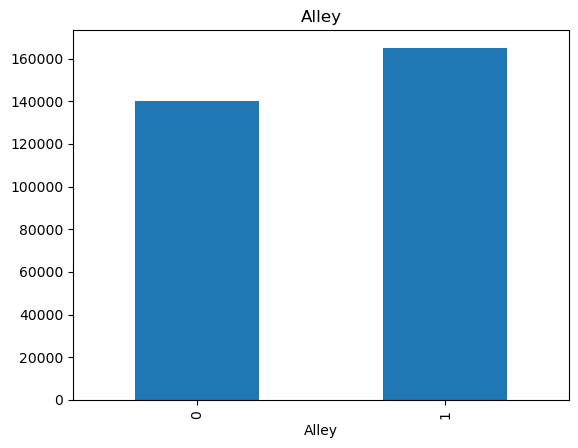

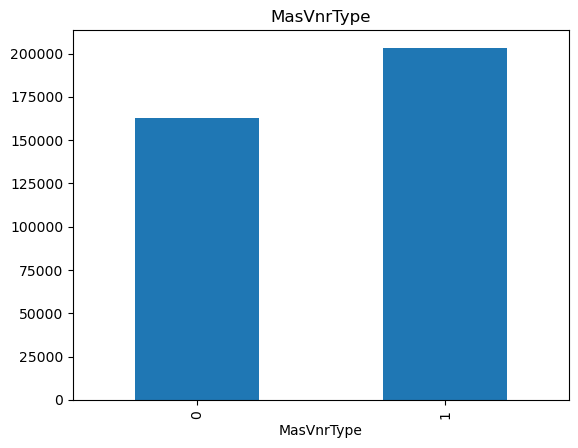

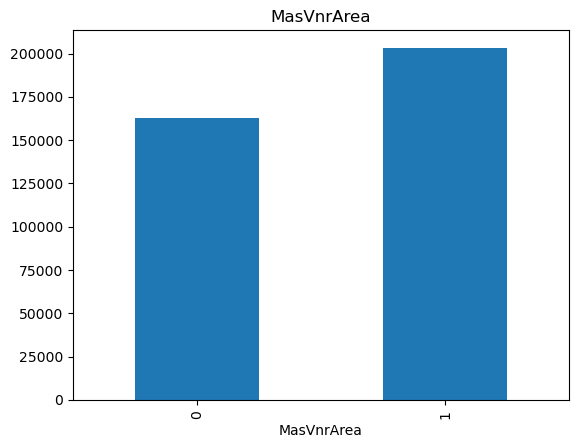

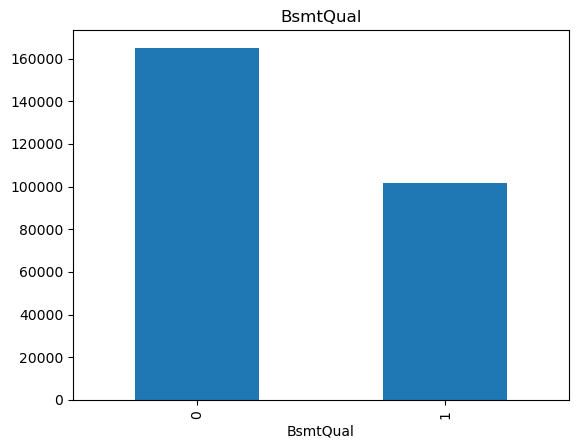

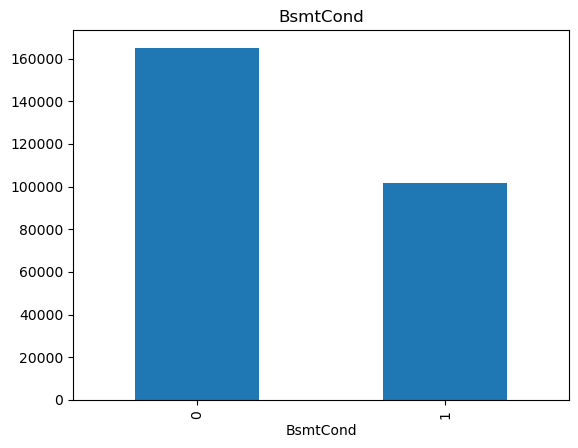

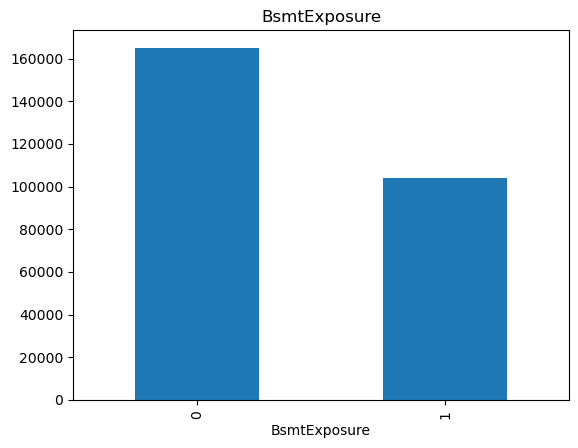

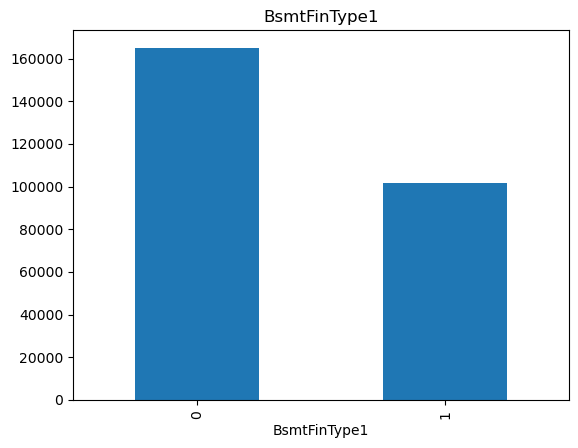

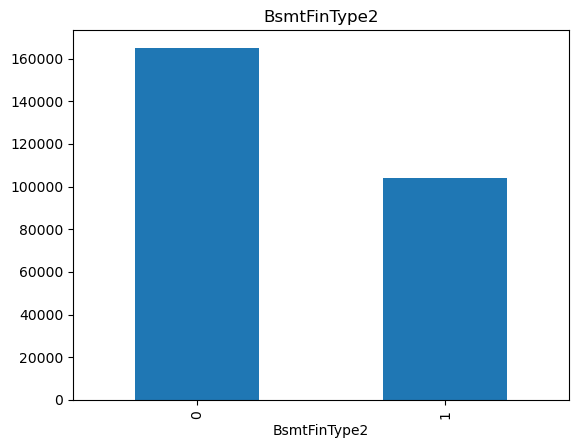

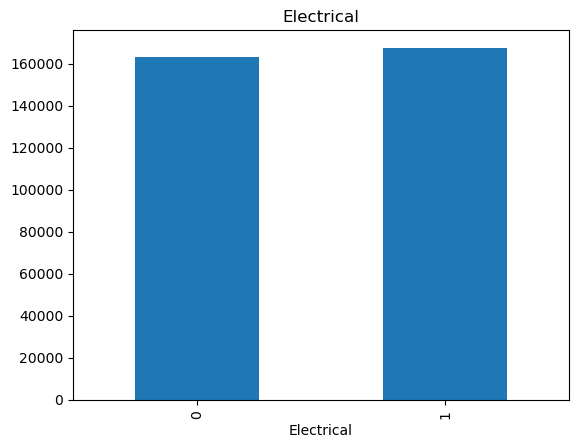

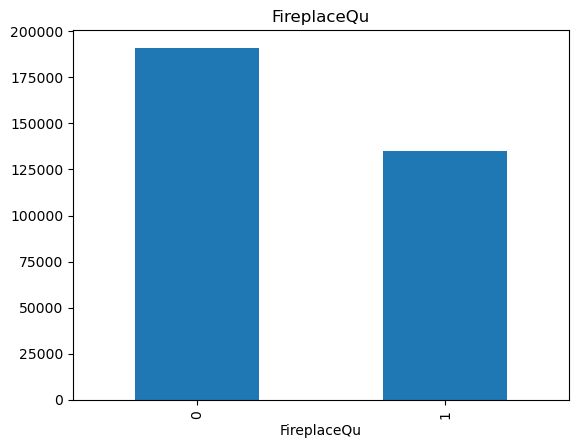

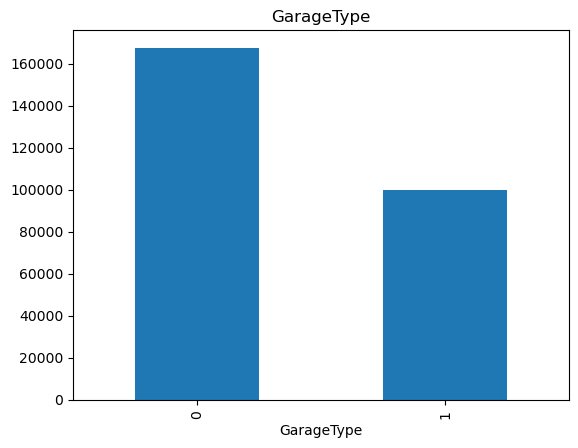

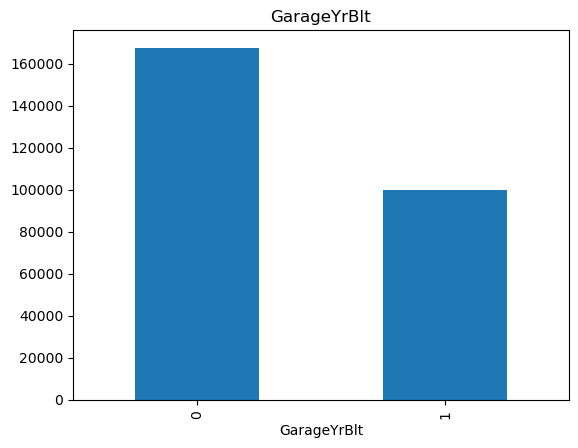

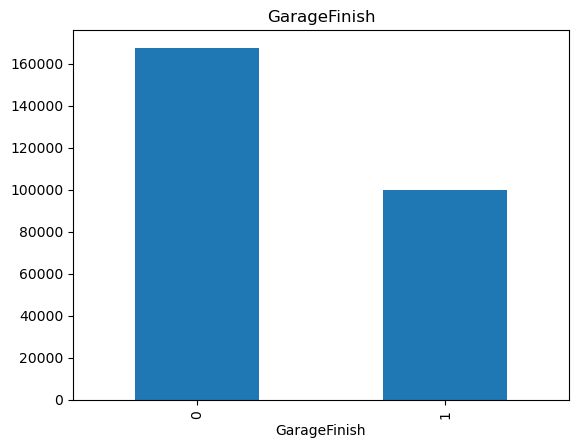

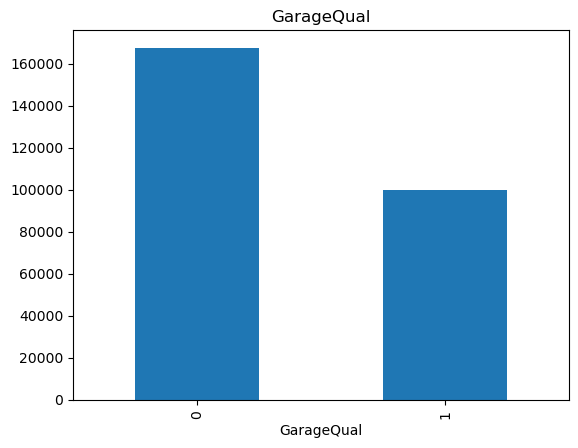

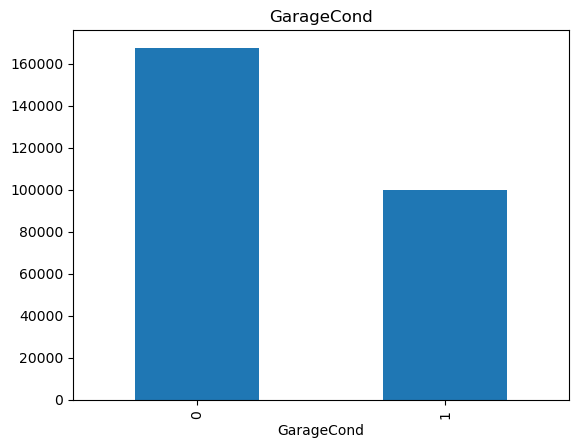

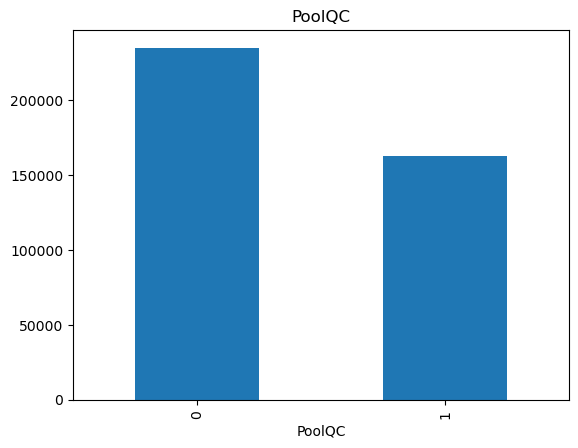

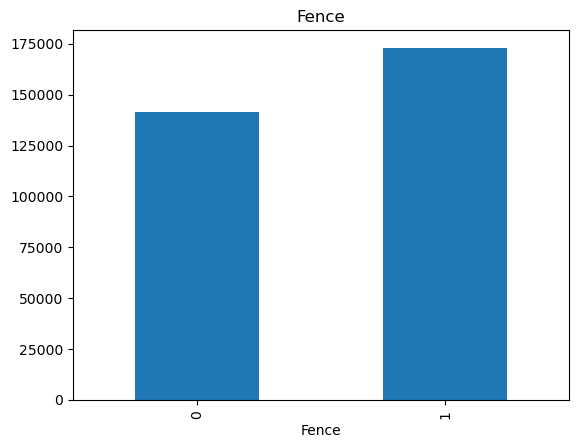

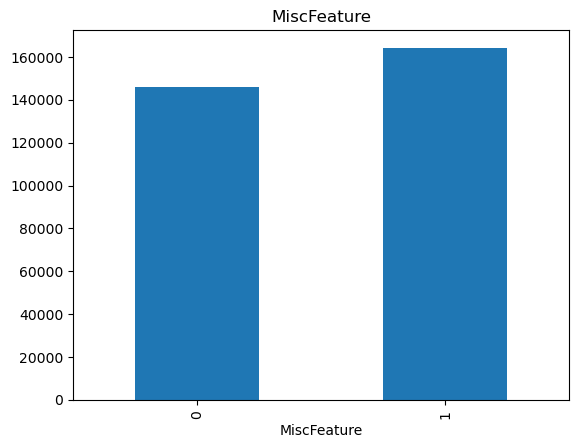

In [7]:
# Since They are many missing values we need to find the relationship between missing values and Sales Price
# If there is a missing value , if may drop it 
# But no , if the missing value has some dependency or is there a relationship with the dependent features
# to see this , we will plot
for feature in feature_with_nan:
    data=df.copy()
    
# Lets make a variable that indicates 1 if the observation was missig
    data[feature]=np.where(data[feature].isnull(),1,0) # if null then 1 otherwiae 0
    
# Let's calculate the median sale price where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot(kind='bar') # nan features along with sales price
    plt.title(feature)
    plt.show()

# If there are lot of missing values,at that case whether the sales price is increasing or not and that will indicate if it is important or not
# If ther are lot of missing value, the price may be low
# First Few:-Because of the high amountof nan value , the price is also high
# After that opposite thing is happening
# Here with the relation between the missing values and the dependent variable is clear
# SO we need to replace the nan value

In [8]:
# We donot require the id
df=df.drop('Id',axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Numerical Variables

In [9]:
# List of numerical variable
# How many features are numerical variable
numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O'] # Not equal to object , then by default i will become numerical

print('Number of numerical variable: ' , len(numerical_features))

# Visualize the numerical variable
df[numerical_features].head()

Number of numerical variable:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
df_null=df[numerical_features].isnull().sum()

In [19]:
df_notnull=df[numerical_features].notnull().sum()

In [23]:
a=df_notnull-df_null
a

MSSubClass       1460
LotFrontage       942
LotArea          1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
MasVnrArea       1444
BsmtFinSF1       1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFinSF     1460
GrLivArea        1460
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1460
KitchenAbvGr     1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageYrBlt      1298
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
MoSold           1460
YrSold           1460
SalePrice        1460
dtype: int64

# Temporal Variable(Eg:- Datetime variable)
## we call this as temporal variable because each and every year new data will be comingup , Current data will be dependent on previous data
## Here we have 4 features of date and time

In [9]:
# List of features containing year information
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature] # If in feature name yr or year is present

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
# Let's Explore the content of these year variable
for feature in year_feature:
    print(feature,df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, ' House Price vs YearSold')

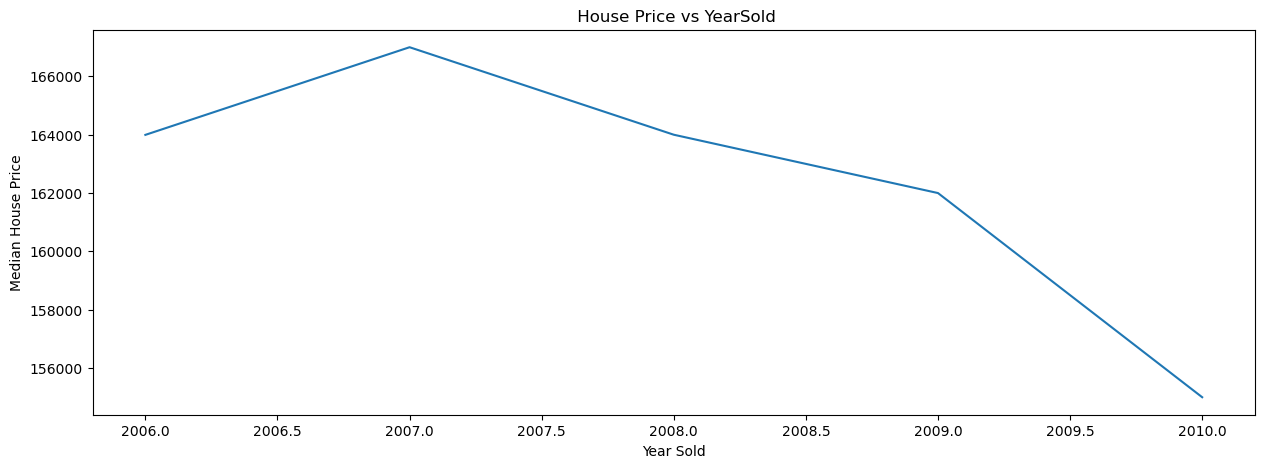

In [11]:
# Let's analyze the temporal datetime variables
# We will check whether there is a relation between (year the house sold) and(sales price)

df.groupby('YrSold')['SalePrice'].median().plot(figsize=(15,5))
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title(" House Price vs YearSold")
# As year went on the price is decreasing

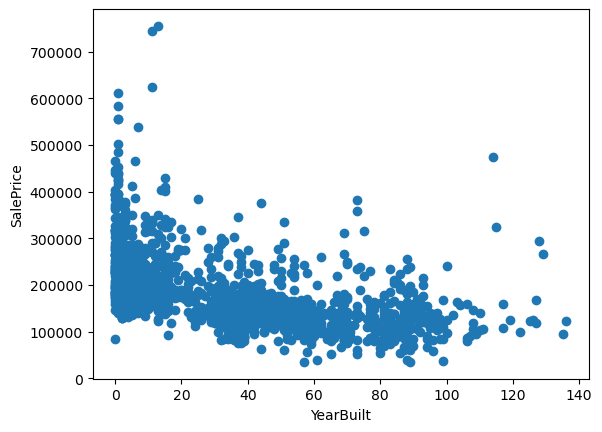

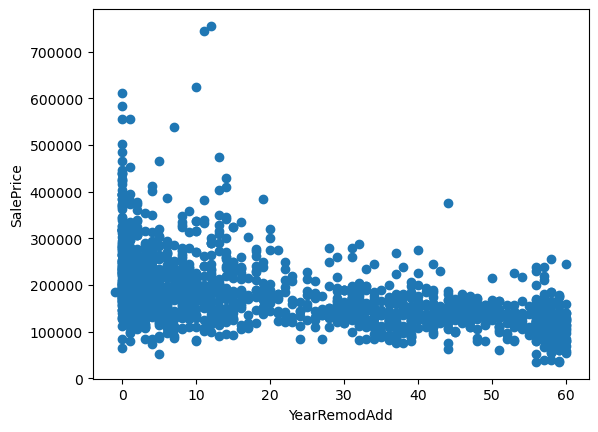

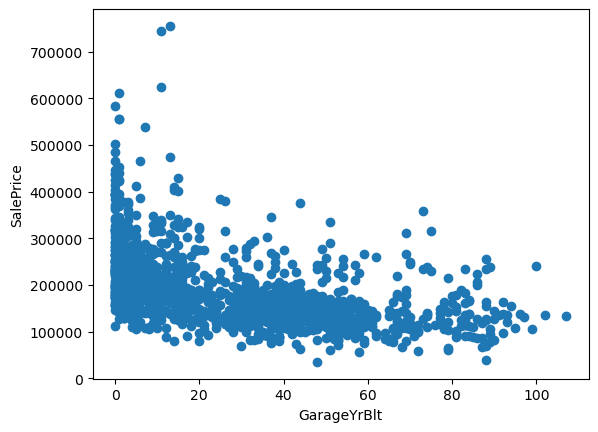

In [12]:
# the above Price is decreasing, So this cannot be true

# We will compare the difference between all years features(year_feature) with SalePrice

for feature in year_feature:
    if feature != 'YrSold':
        data=df.copy()
        # We will capture the difference between year variable( feature present in year_feature , except (Yr sold) and the year of the house sold
        data[feature]=data['YrSold']-data[feature]  # Not including year sold
    
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
        
# For year built , the sales price, at begining th sales price is quite good(new house) , but eventually it started decreasing  because of aging
# For modifiaction year, after 60 years , It is going negative

In [13]:
# Numerical variable 2 types:-
# 1. discrete variable/features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
# For each and every category , i am considering 25 as my threshold parameter 

print ("Discrete Variables Count {}".format(len(discrete_feature)))

Discrete Variables Count 17


In [14]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [15]:
df[discrete_feature]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


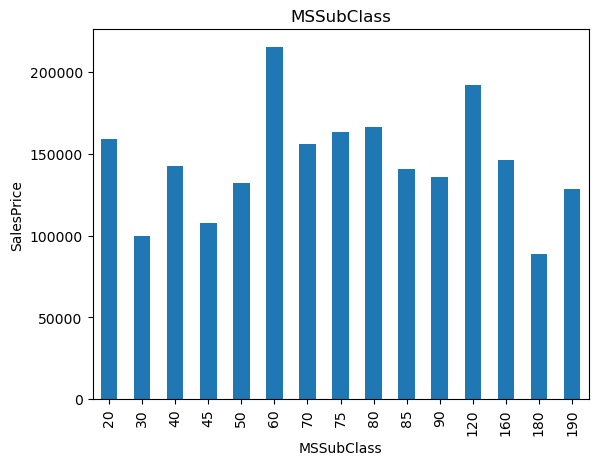

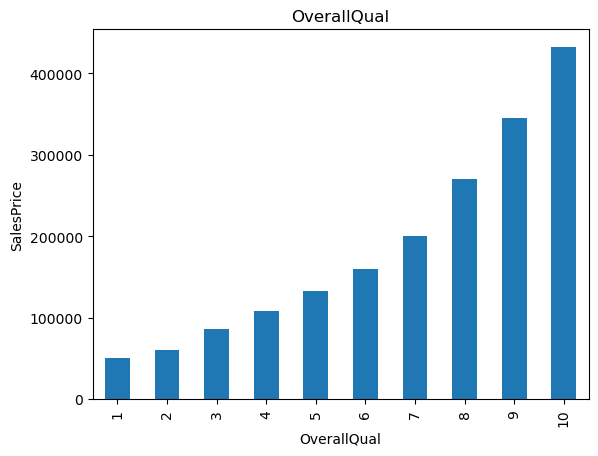

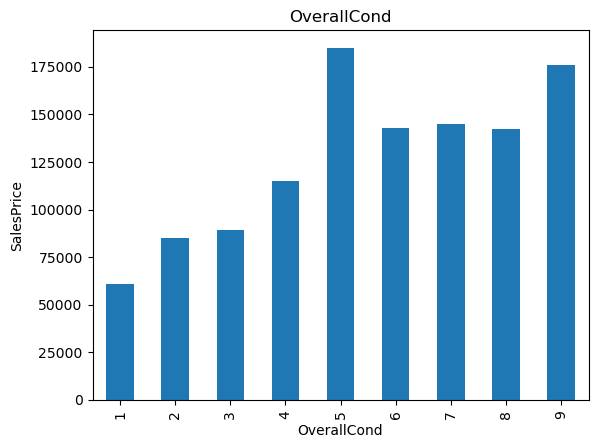

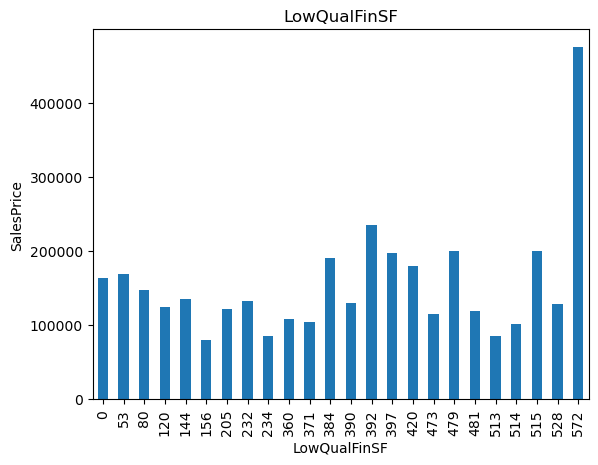

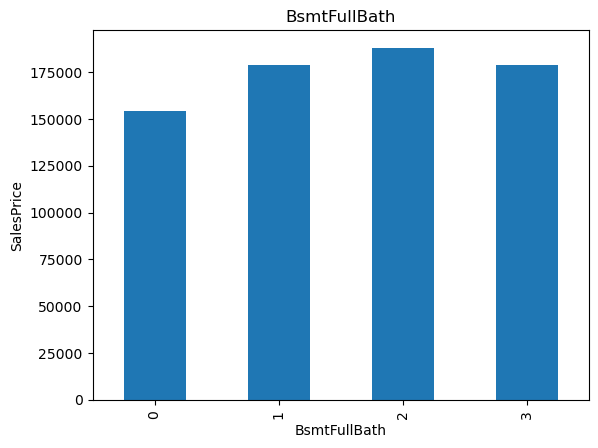

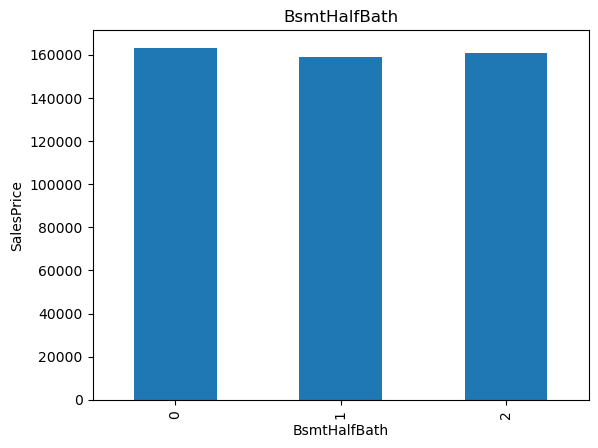

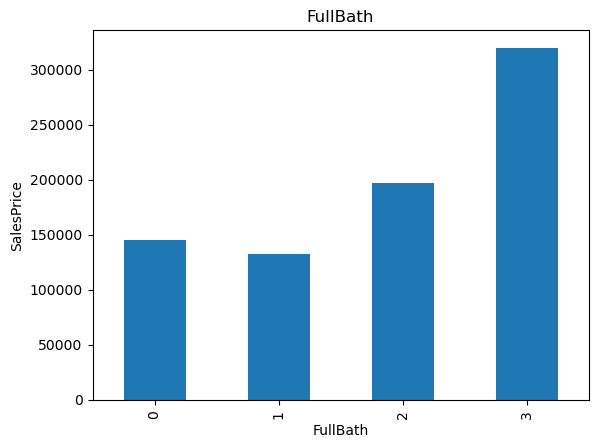

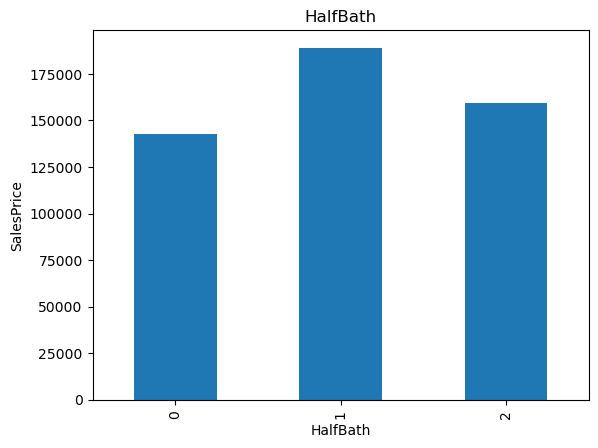

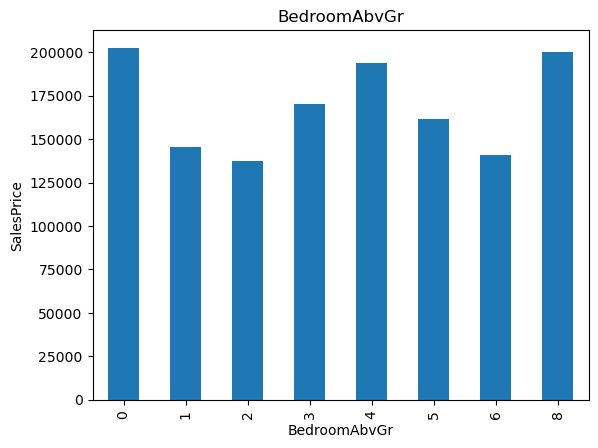

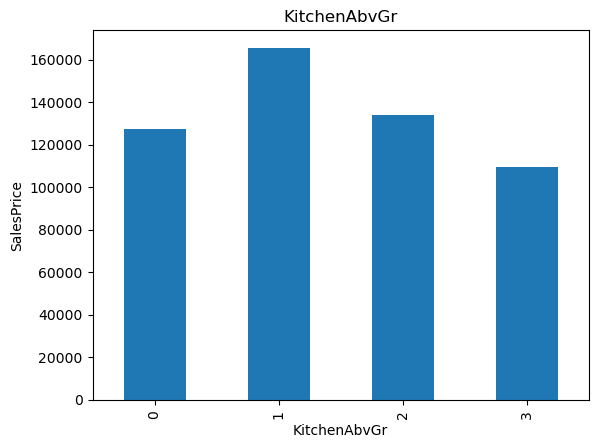

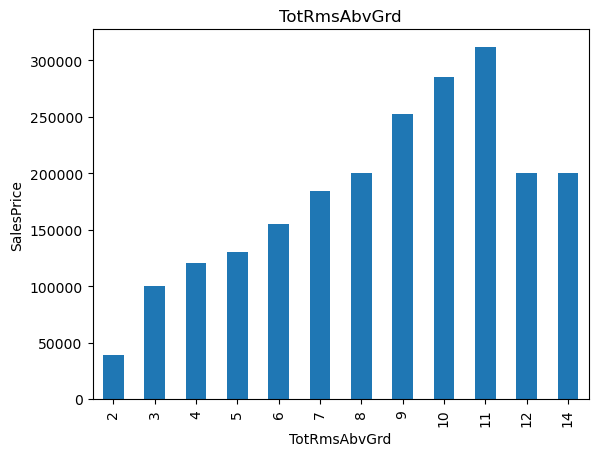

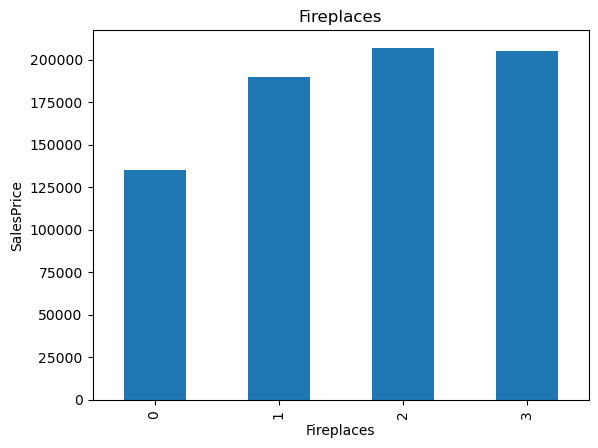

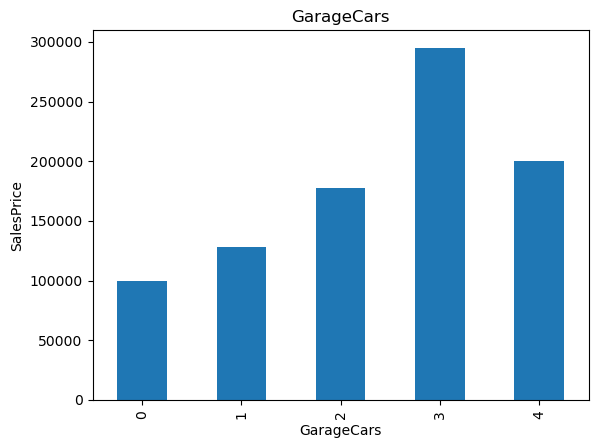

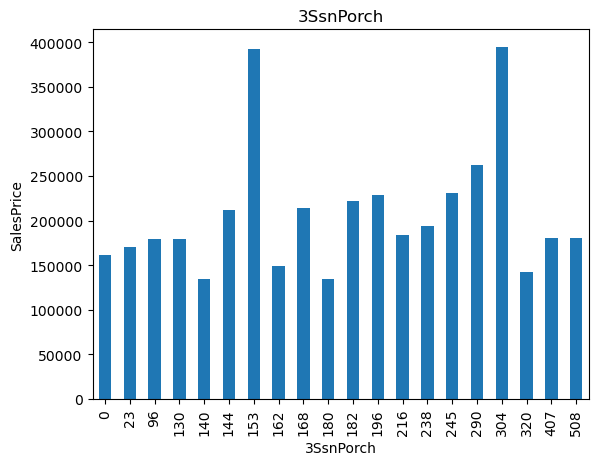

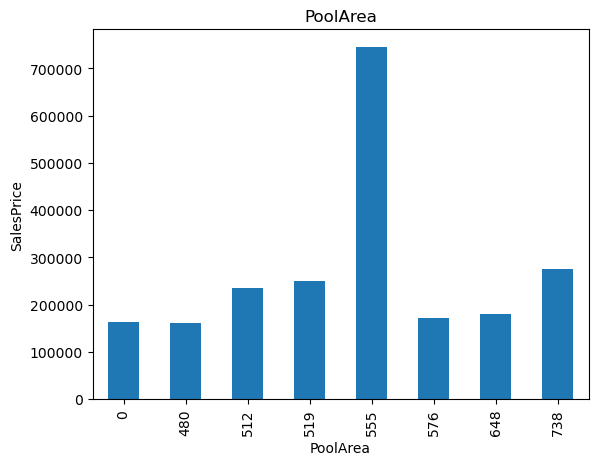

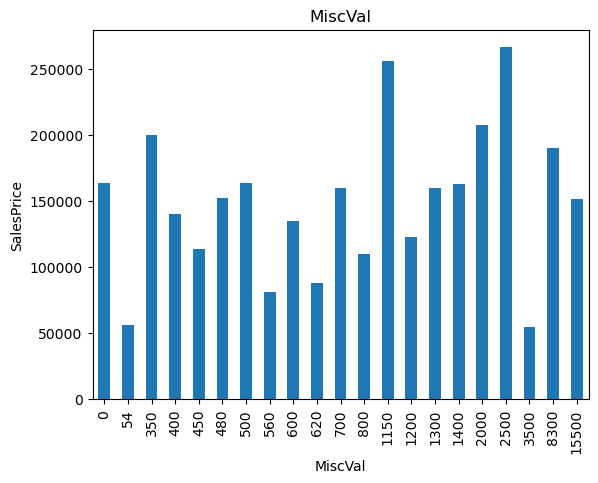

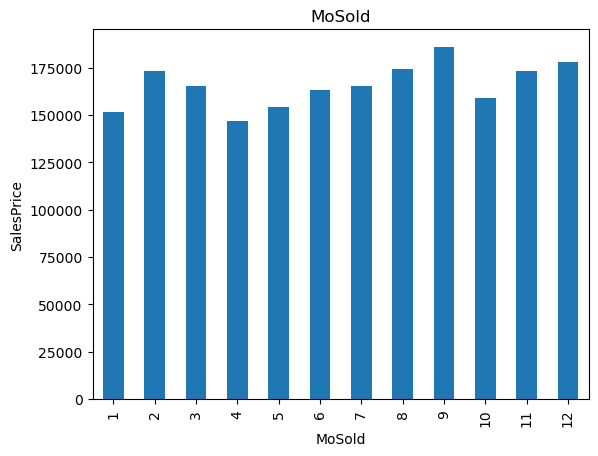

In [16]:
## Lets Find the relationship between them and Sale Price

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()
# less than 25 features (20,30,...)
# There is a relaionship , observe the graph properly

In [17]:
# 2. Continuous Variable

Continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + year_feature]
 

print ("Continuous Variables Count {}".format(len(Continuous_feature)))

Continuous Variables Count 16


In [18]:
df[Continuous_feature]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


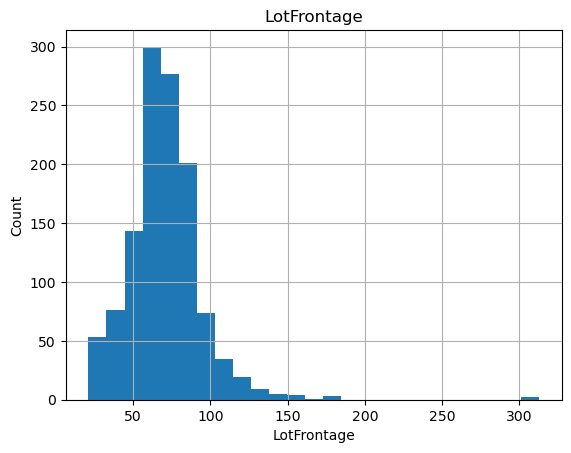

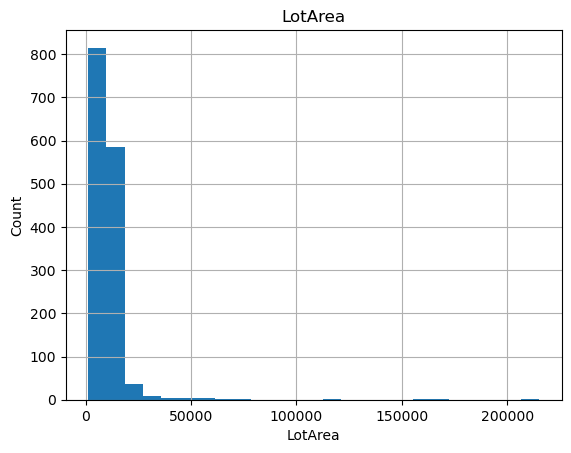

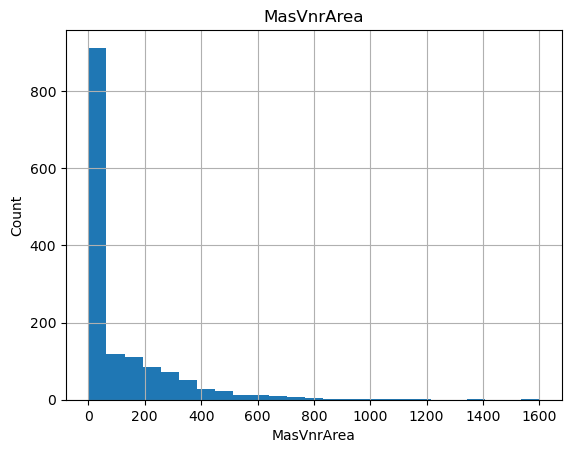

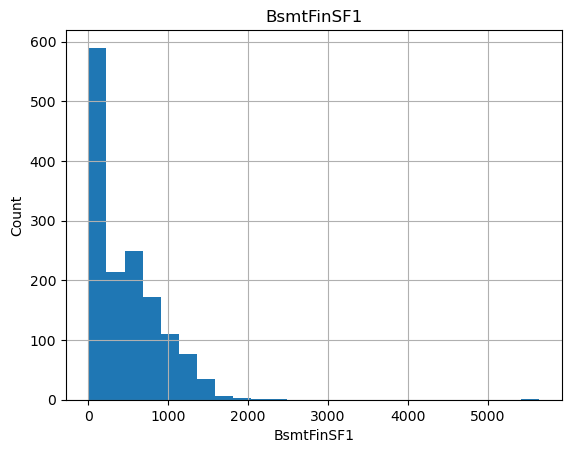

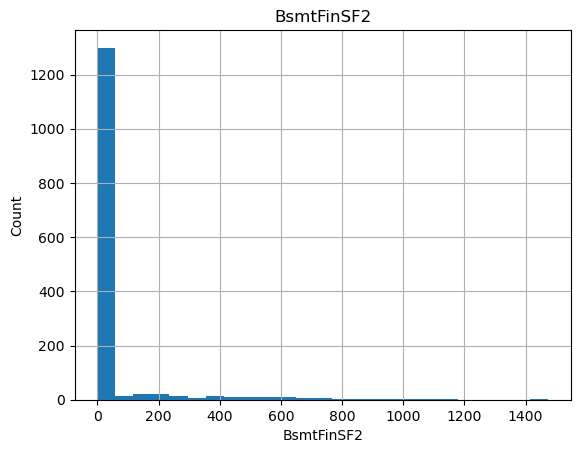

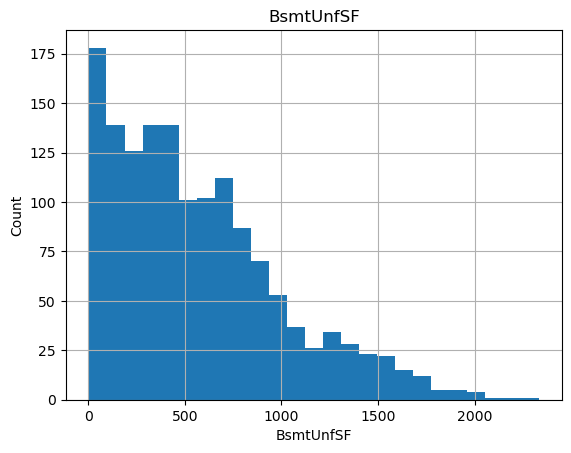

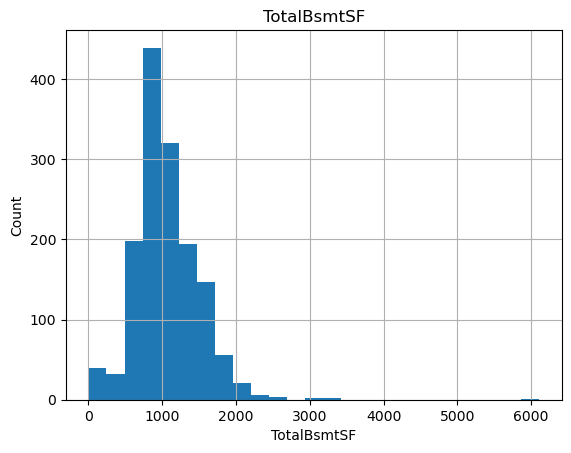

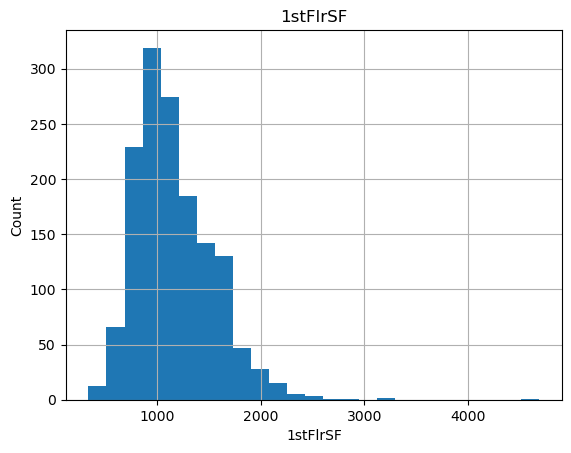

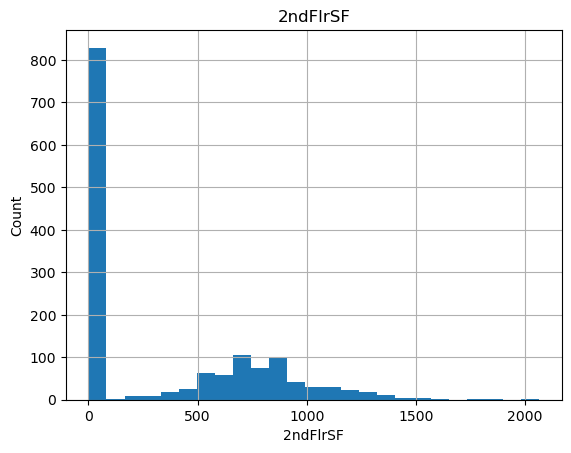

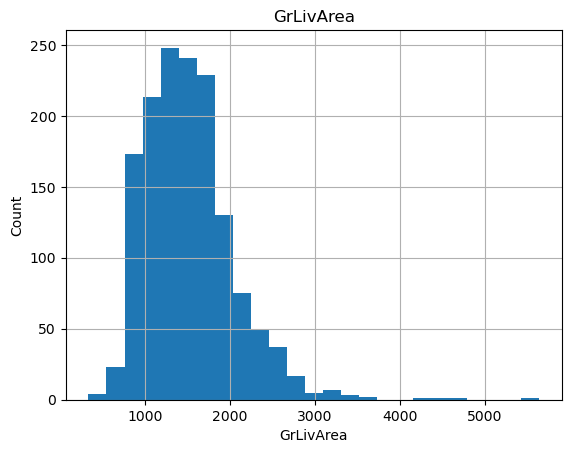

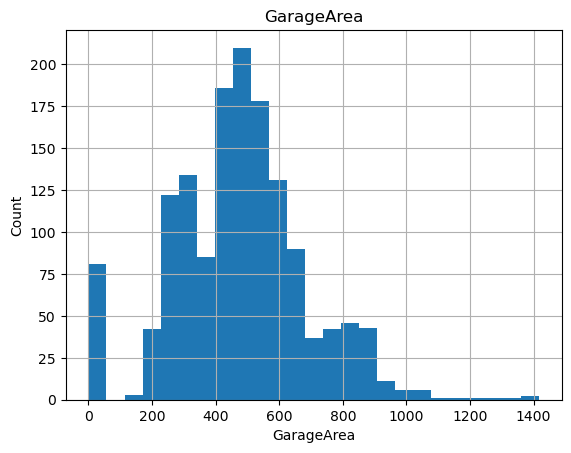

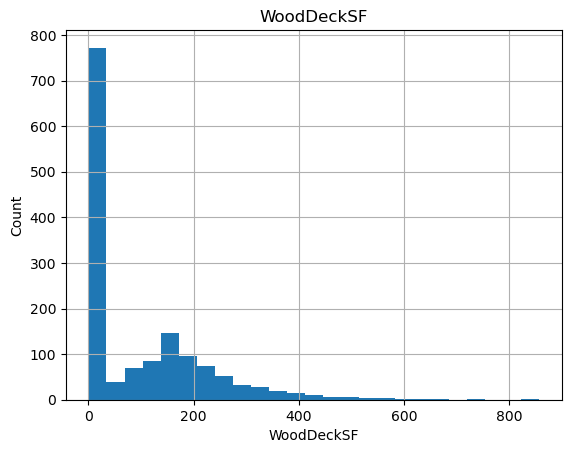

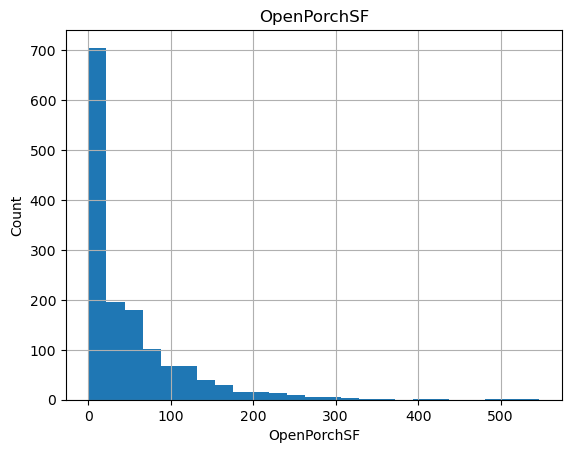

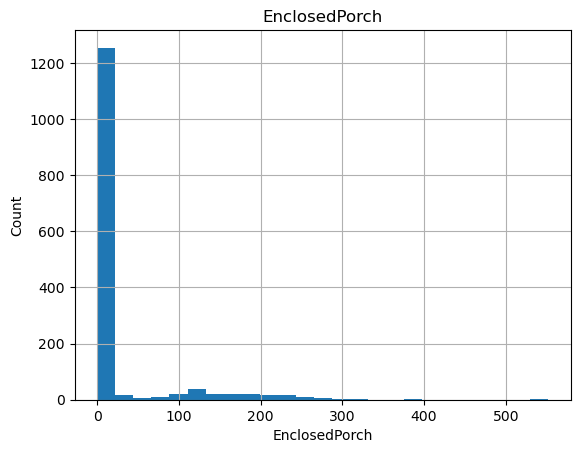

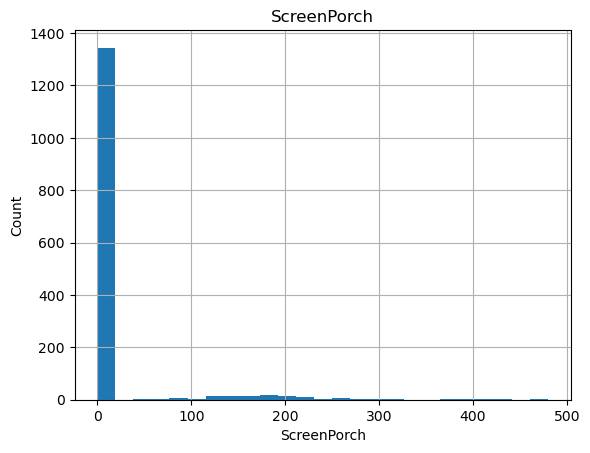

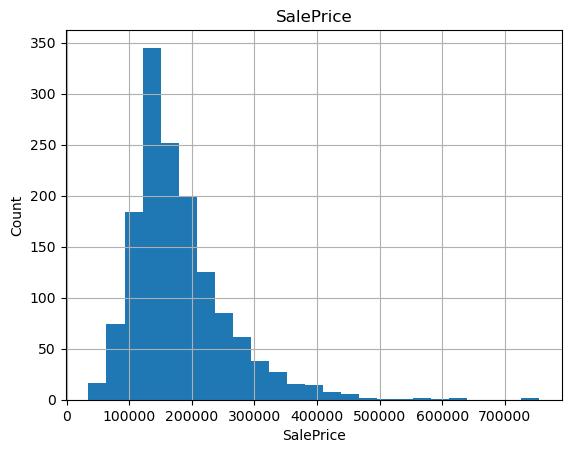

In [19]:
## In continuous value , we need to find the distribution with the help of histogram

for feature in Continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()
# Some have gausian distribution but some don't
# they are mainly skewed data

In [30]:
for feature in Continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        print(feature)
        #print(data.isnull().sum())

MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
2ndFlrSF
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch


# Exploratory Data Analysis Part 2

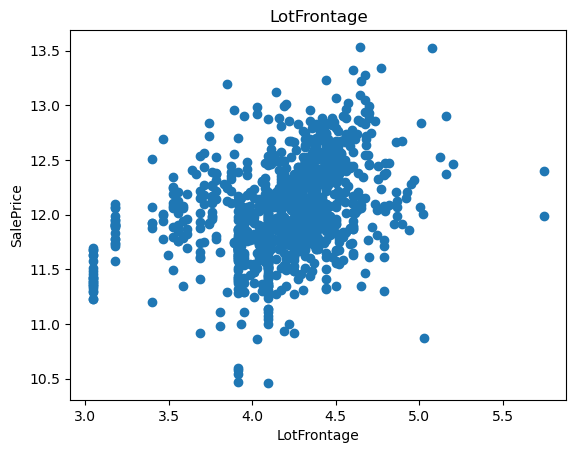

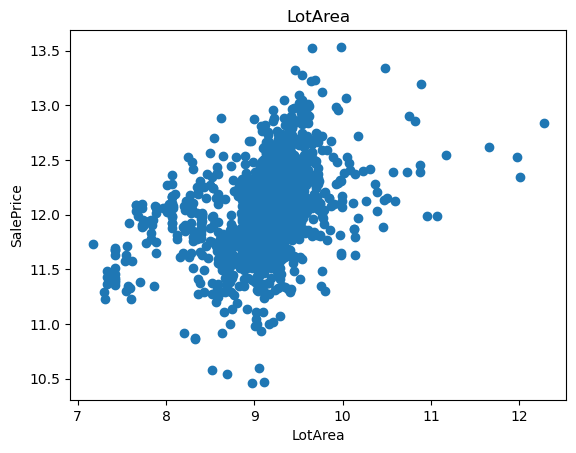

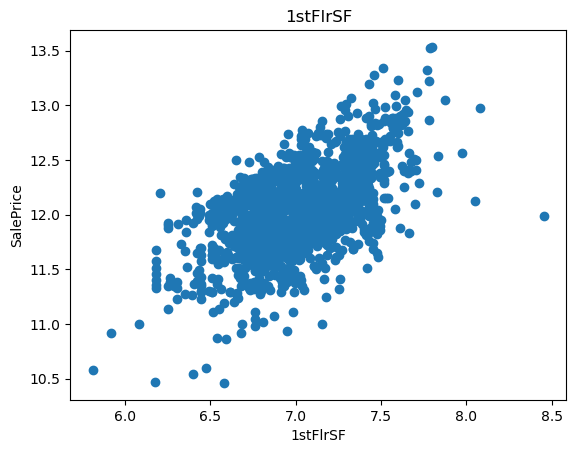

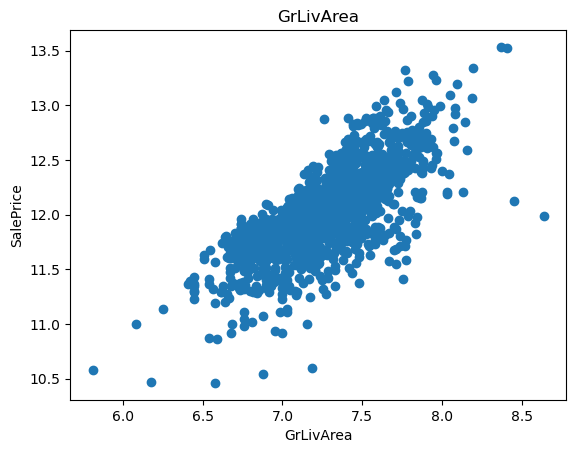

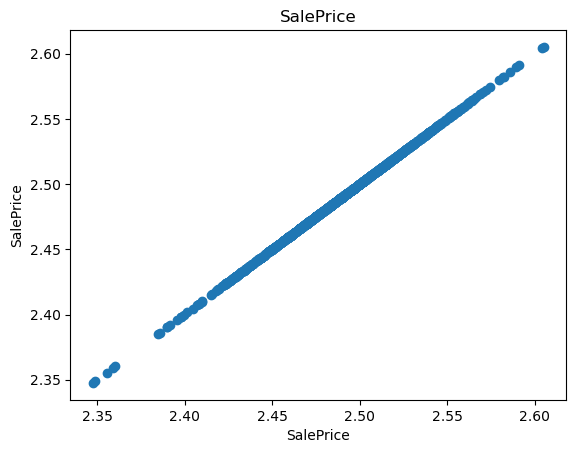

In [31]:
# We transform the skewed data to gausian distribution
# We will be using logarithmic transformation to convert to skewed to gaussian distribution
# I will run through all the continuous variable


for feature in Continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique(): # Logarithimic cannot handle zero value(If zero or null present  present , it will not be considered i.e. pass)
        pass
    else:
        data[feature]=np.log(data[feature]) # Apply log on features
        data['SalePrice']=np.log(data['SalePrice']) # Apply log on sales Price
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()
# After Doing the log normal distributiom for the features and sales price, we get the plot


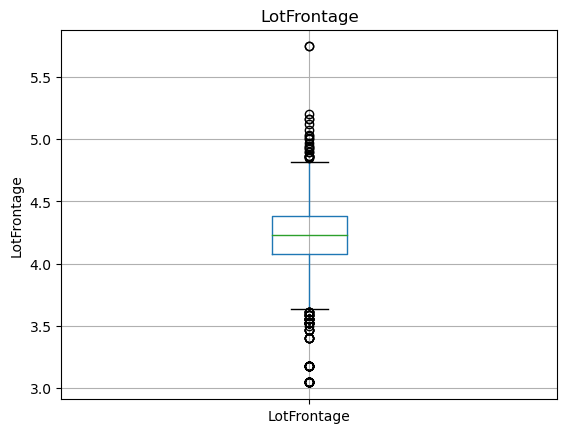

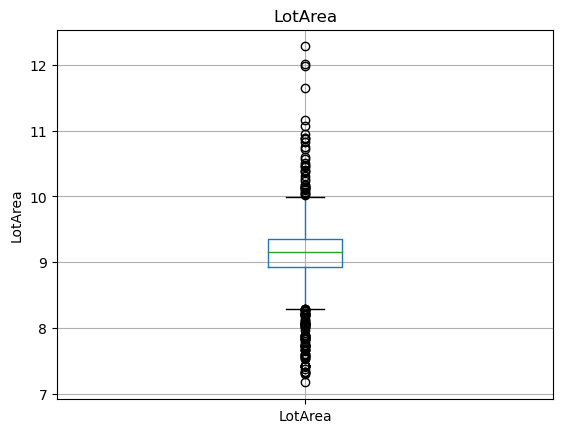

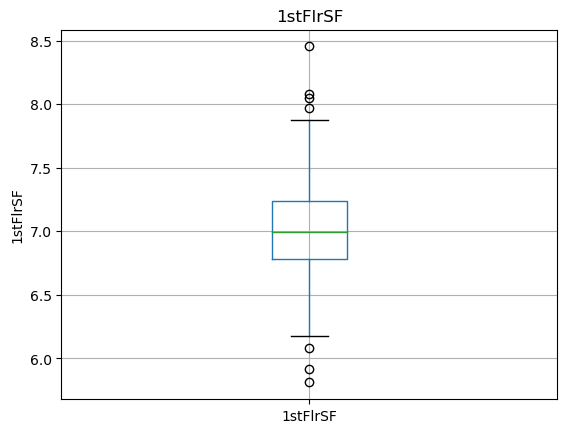

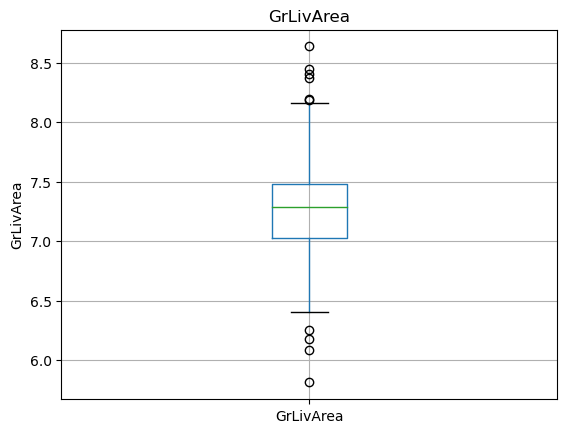

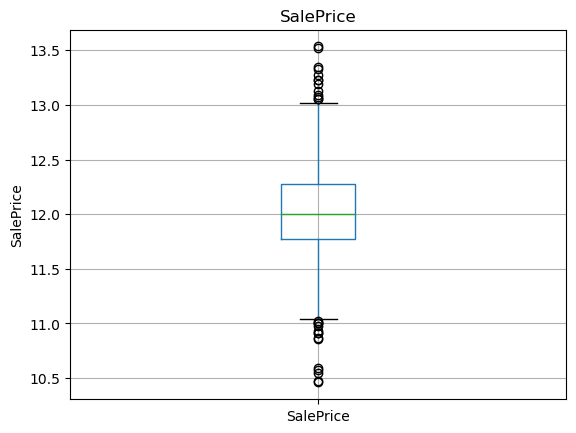

In [32]:
# Outliers

for feature in Continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique(): # If zero present then we will not consider it
        pass
    else:
        data[feature]=np.log(data[feature]) # log works well with 
        data.boxplot(column=feature) # Find outliers with the help of boxplot
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

        

## Categorical Variable

In [34]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [47]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
# Check the cardinality(How many different categories we have in a feature)
# Find how many unique catgories each and every feature is having
for feature in categorical_features:
    print(" The Feature is {} and number of Categories are =  {}" .format(feature,len(df[feature].unique())))
# handle with the help of OHE

 The Feature is MSZoning and number of Categories are =  5
 The Feature is Street and number of Categories are =  2
 The Feature is Alley and number of Categories are =  3
 The Feature is LotShape and number of Categories are =  4
 The Feature is LandContour and number of Categories are =  4
 The Feature is Utilities and number of Categories are =  2
 The Feature is LotConfig and number of Categories are =  5
 The Feature is LandSlope and number of Categories are =  3
 The Feature is Neighborhood and number of Categories are =  25
 The Feature is Condition1 and number of Categories are =  9
 The Feature is Condition2 and number of Categories are =  8
 The Feature is BldgType and number of Categories are =  5
 The Feature is HouseStyle and number of Categories are =  8
 The Feature is RoofStyle and number of Categories are =  6
 The Feature is RoofMatl and number of Categories are =  8
 The Feature is Exterior1st and number of Categories are =  15
 The Feature is Exterior2nd and number 

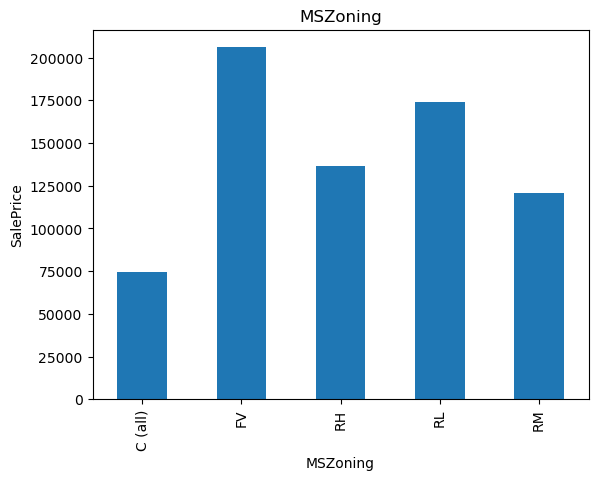

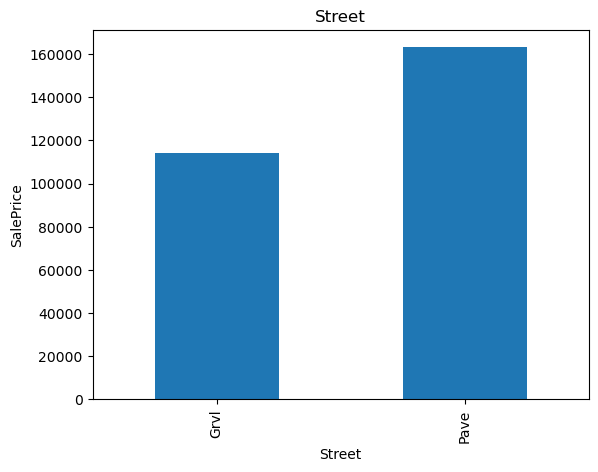

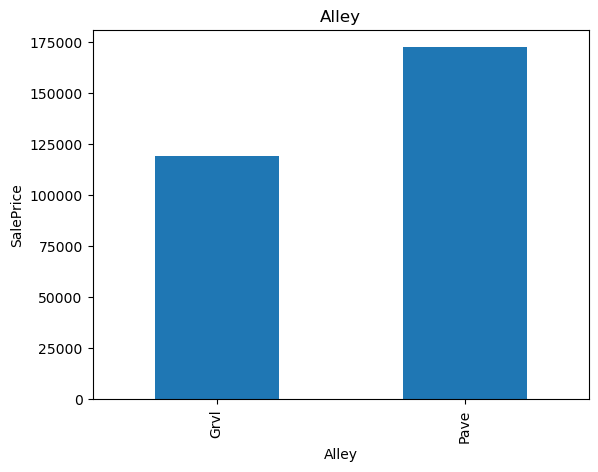

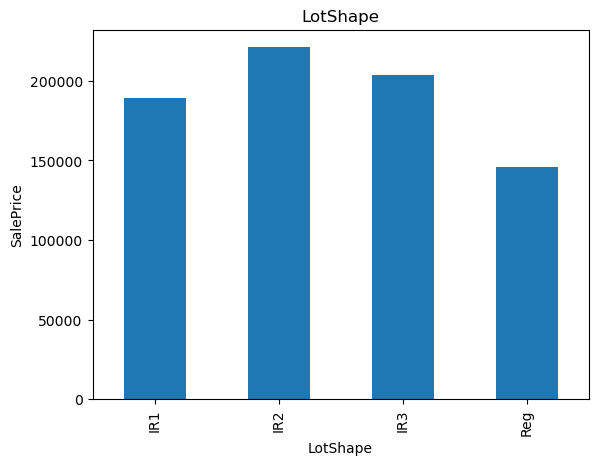

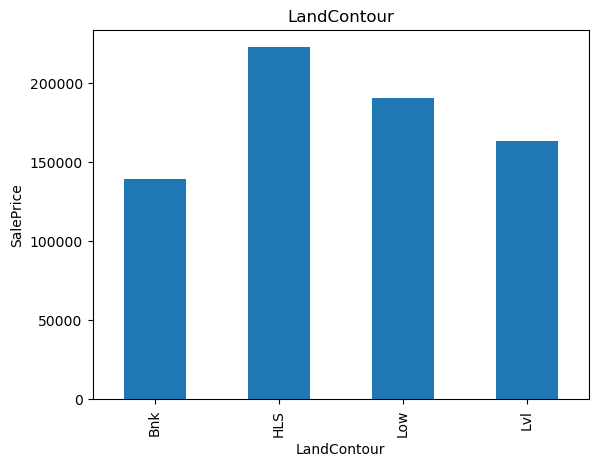

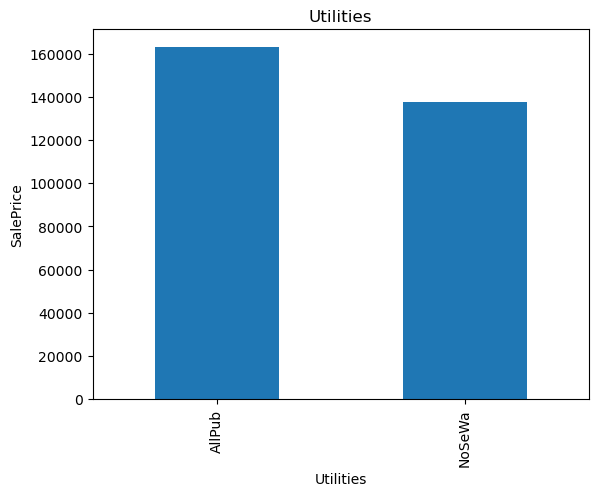

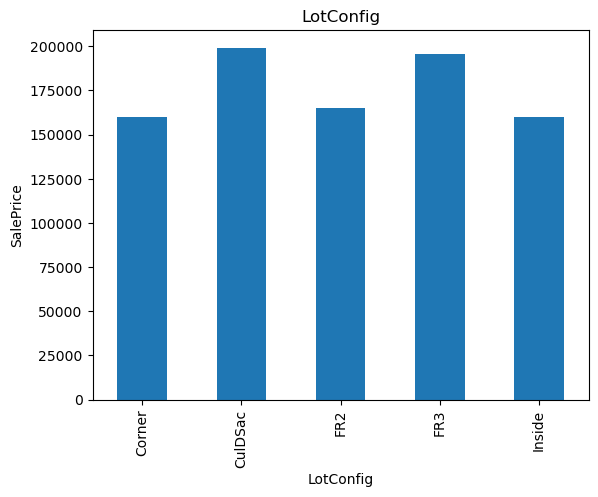

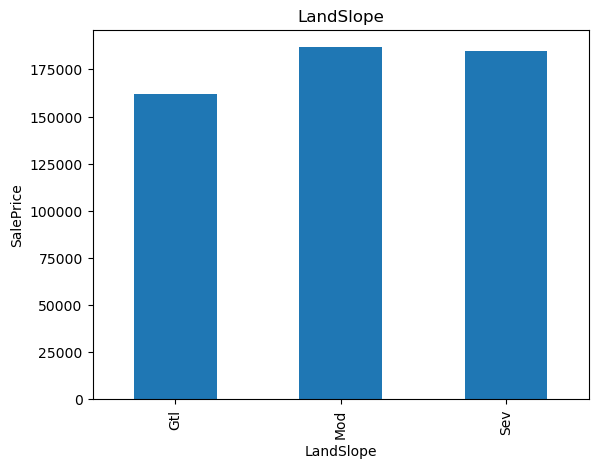

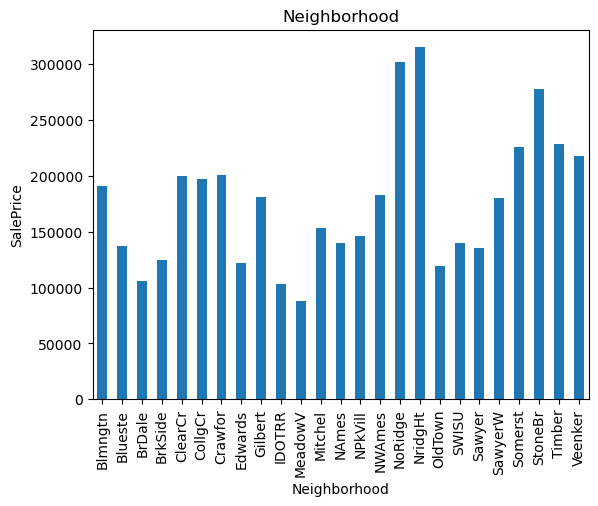

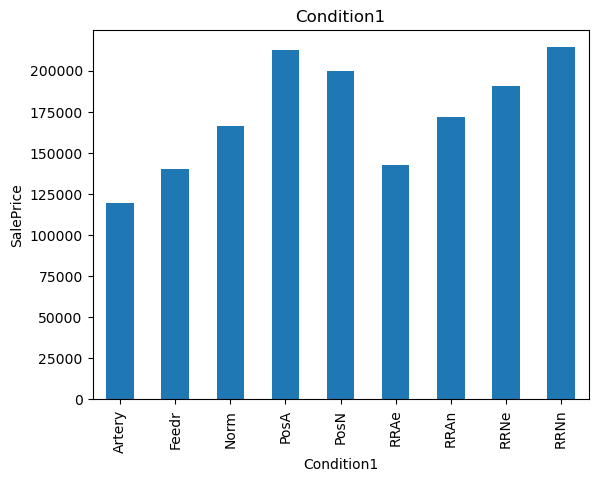

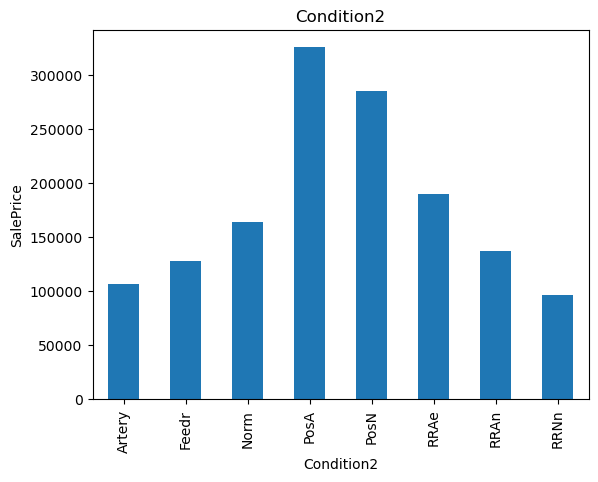

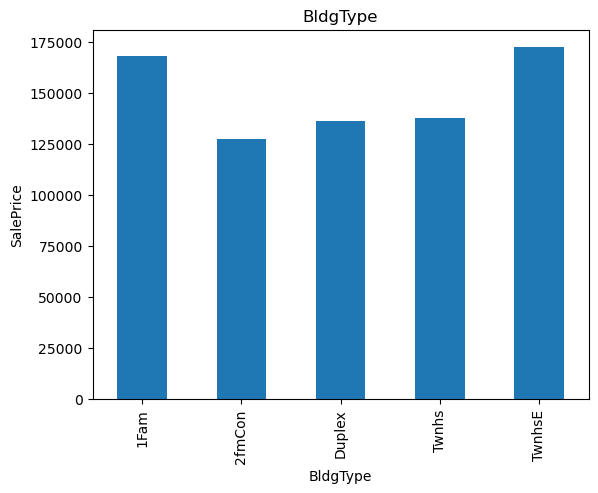

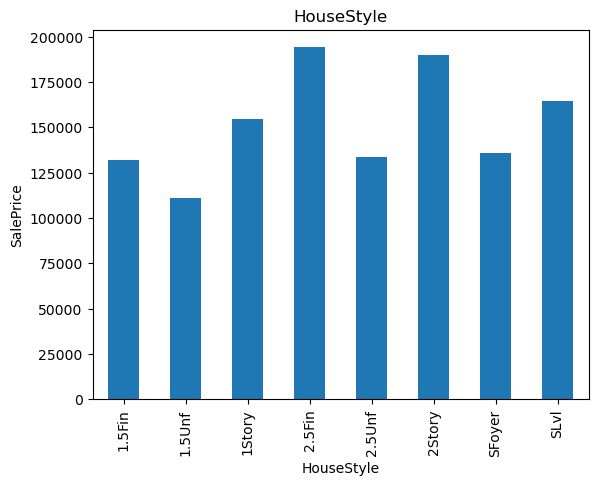

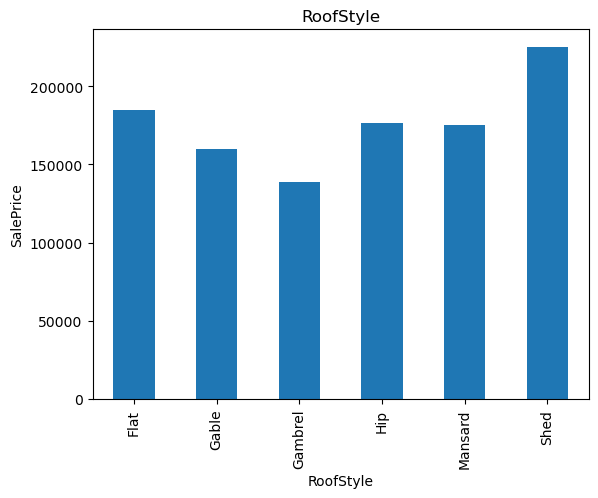

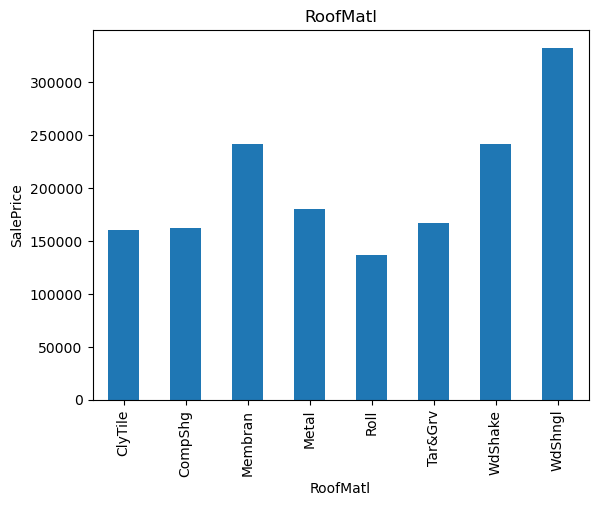

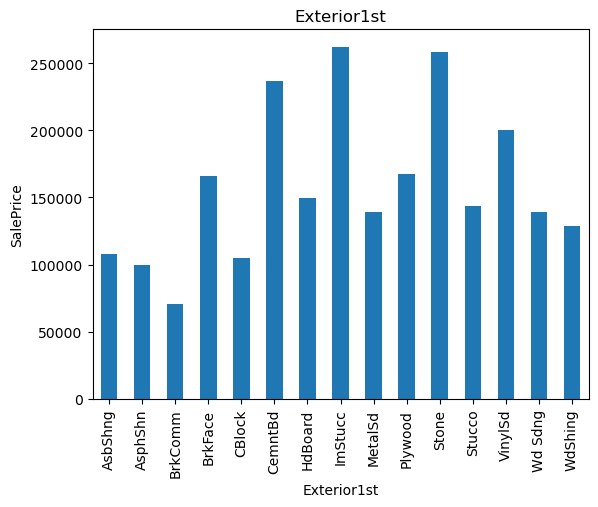

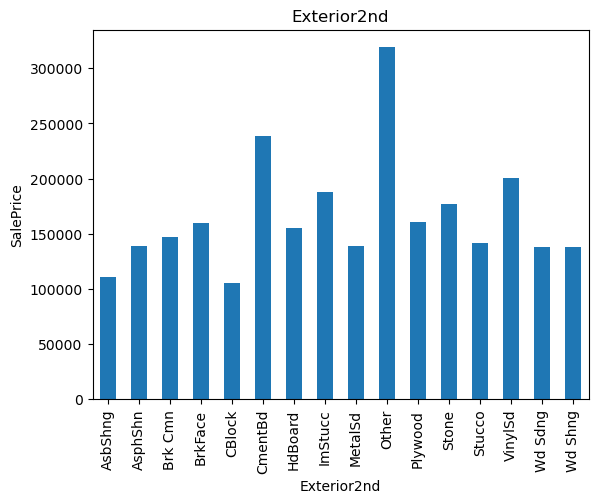

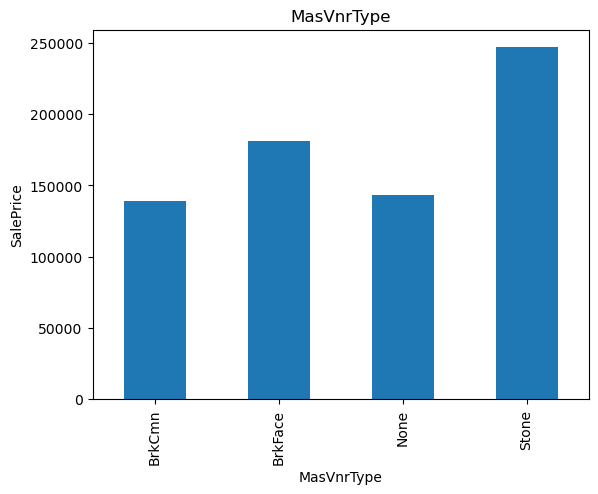

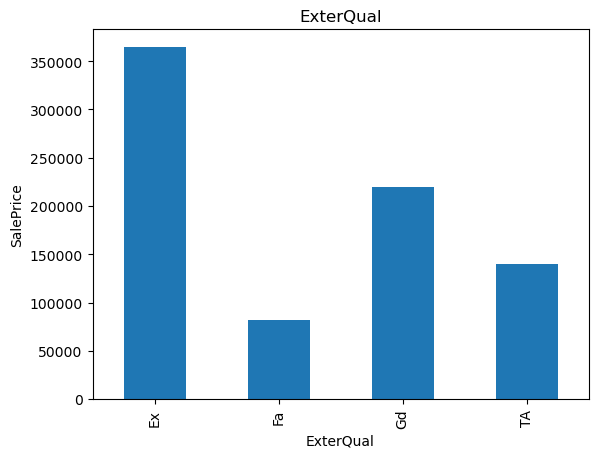

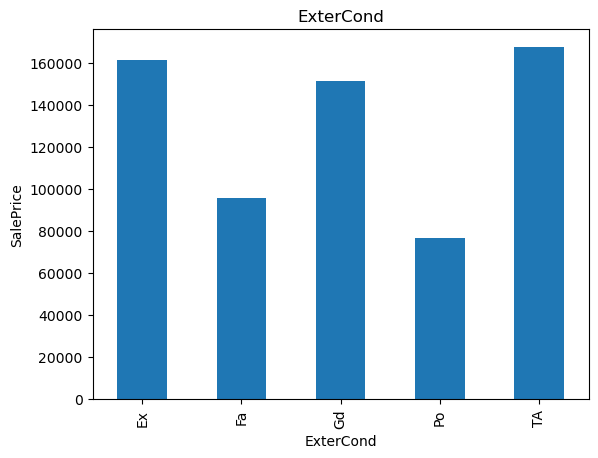

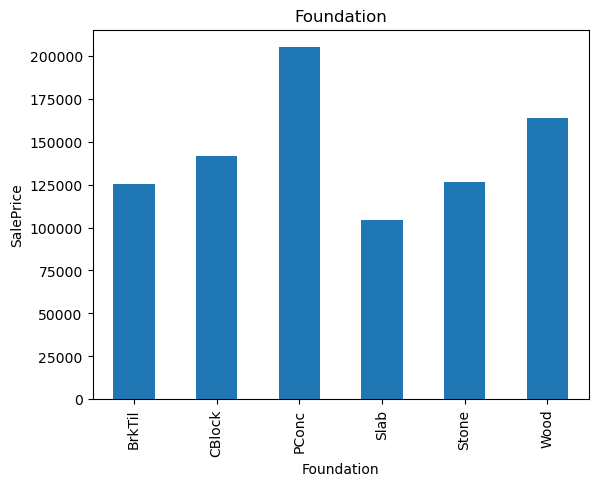

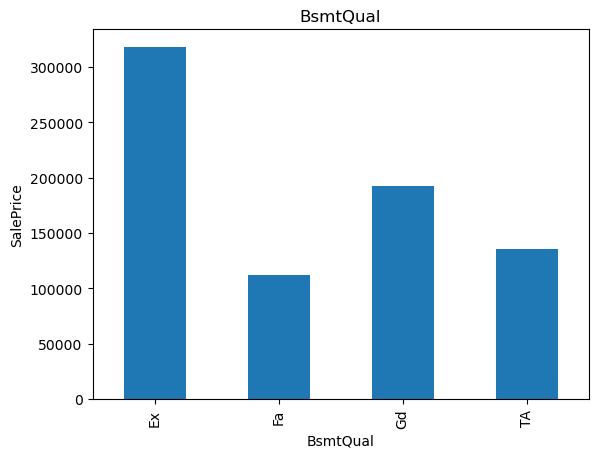

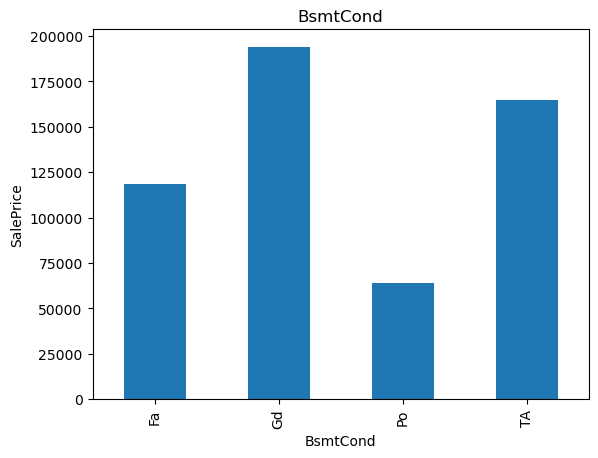

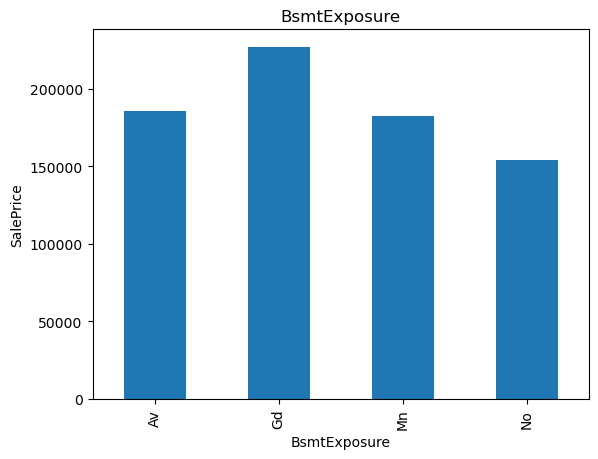

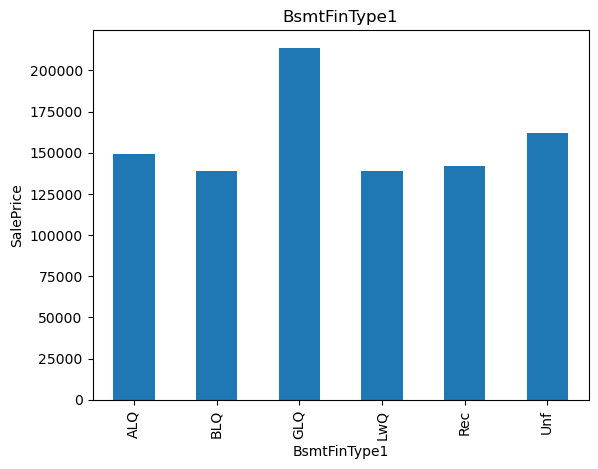

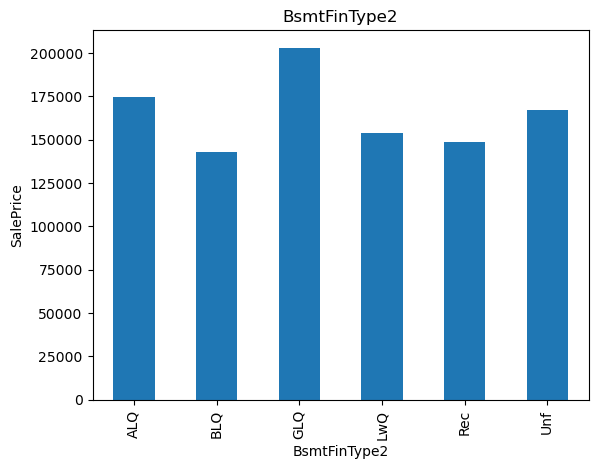

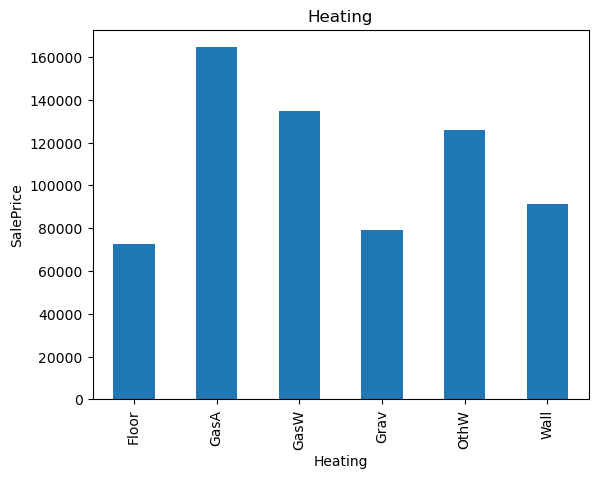

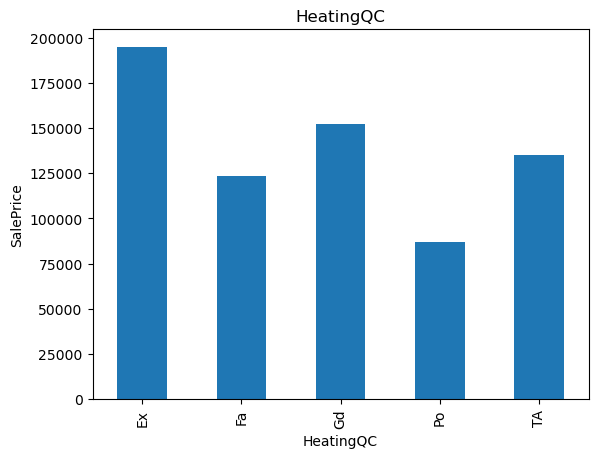

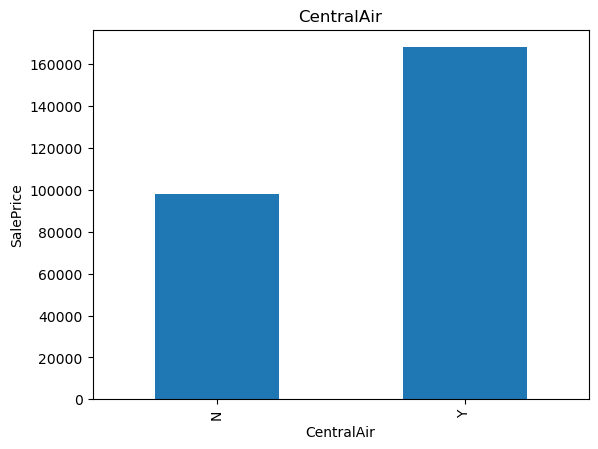

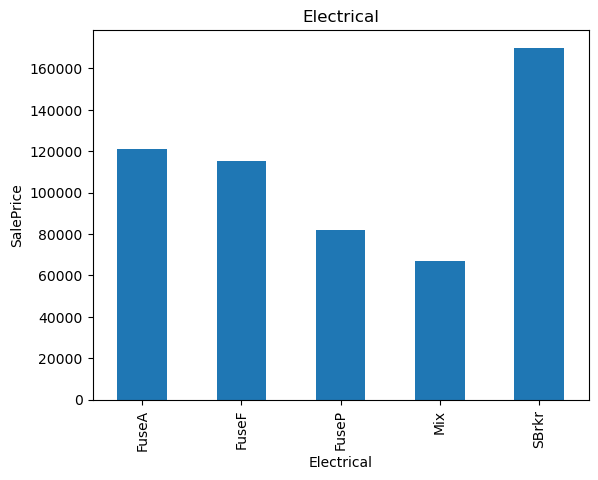

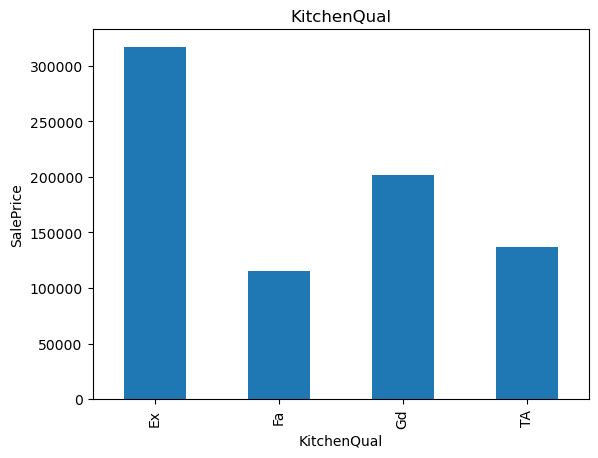

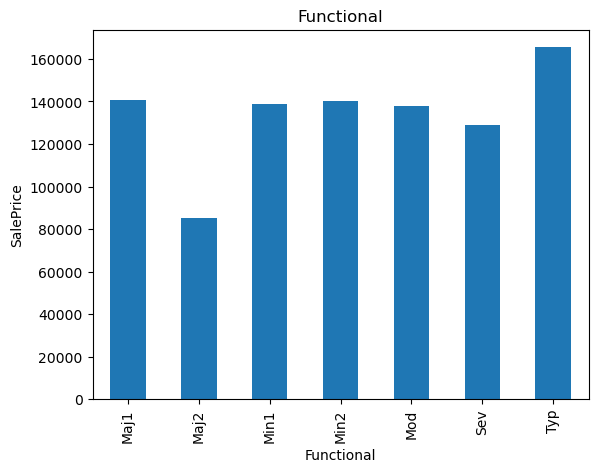

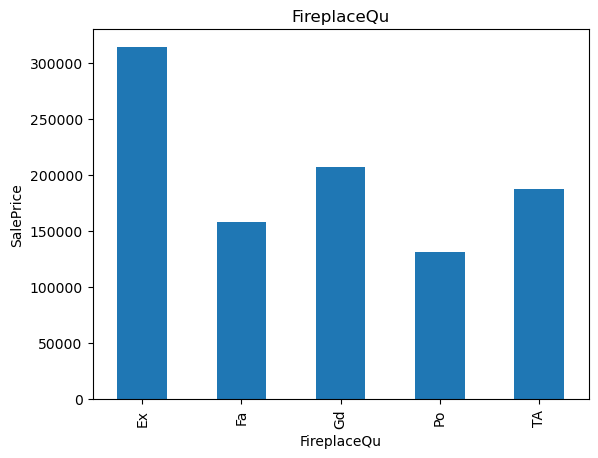

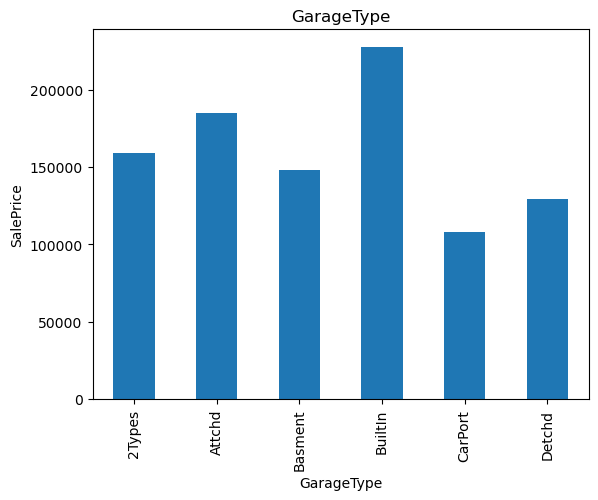

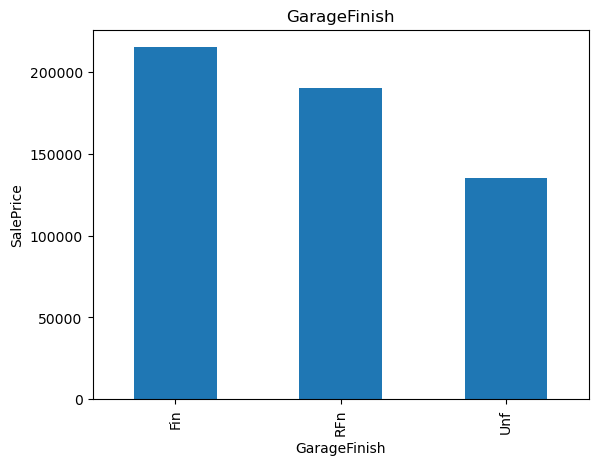

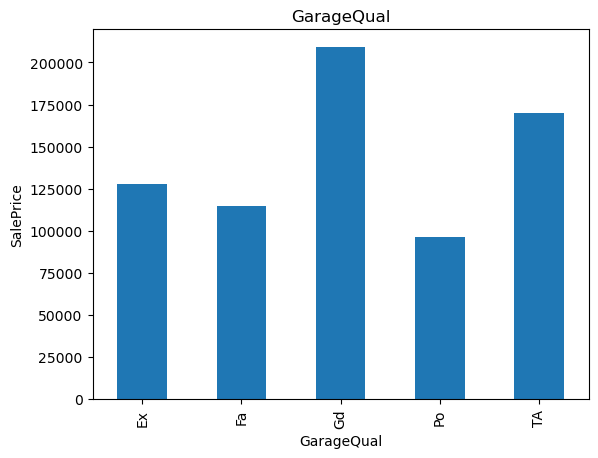

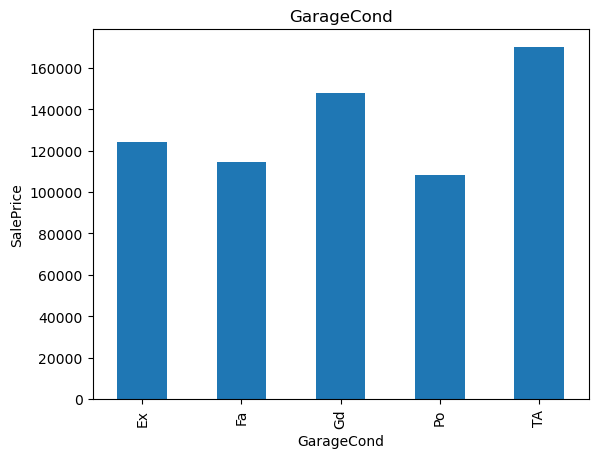

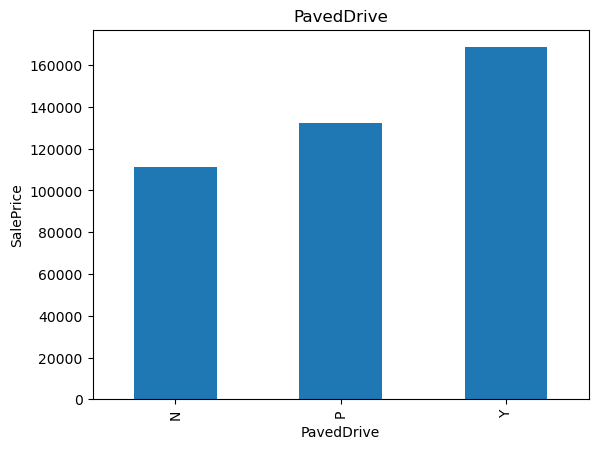

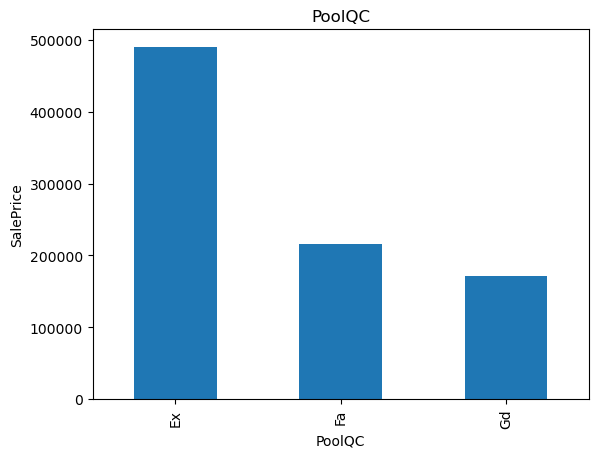

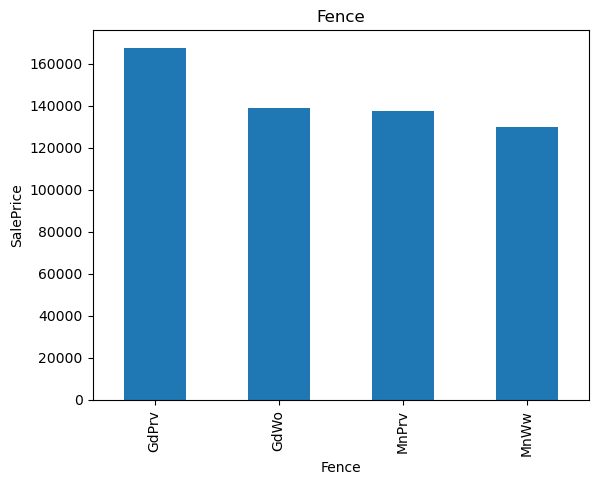

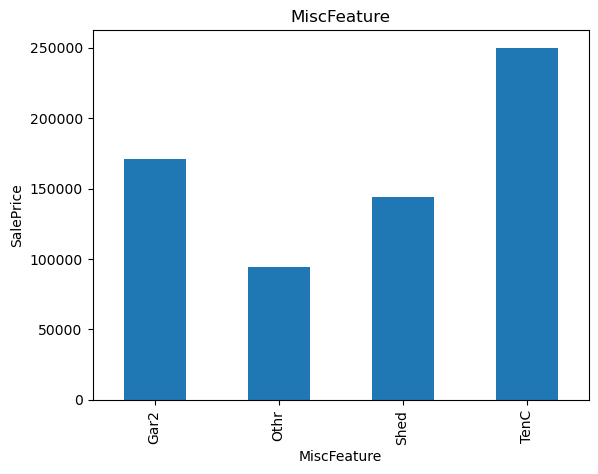

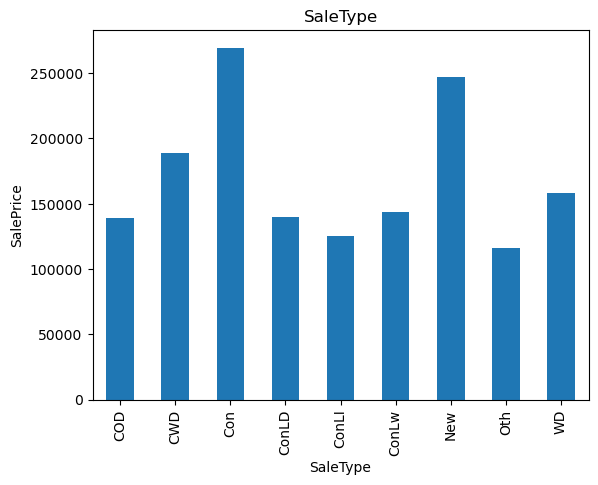

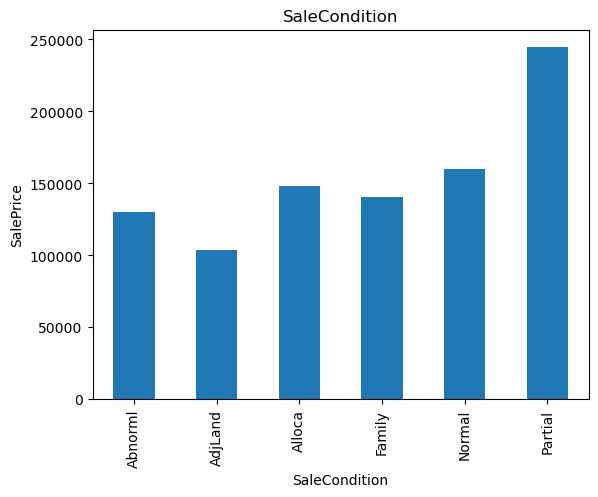

In [49]:
# Find the relationship between categorical variable and dependent feature salesPrice
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    
# Which categorical features have highest value